# Ejercicio 3
## DTFT vía la DFT
## Integrantes 
*
*
*
*

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, fftshift
plt.rcParams.update( {
    'font.size': 20,
    'figure.figsize': (6,4),
    'savefig.dpi': 120
} )

In [44]:
def calcular_fft( x, N, numero_muestras=None ):
    if( type(N)!= int ):
        fft_resultado = {
            'X': [],
            'shift_X': [],
            'freq': [],
            'N': []
        }
        for N_ in N:
            if( numero_muestras ):
                resultado_N = calcular_fft( x, N_, numero_muestras )
            else:
                resultado_N = calcular_fft( x, N_, N_ )
                
            fft_resultado['N'].append( N )
            for key in resultado_N:
                fft_resultado[ key ].append( resultado_N[ key ] )
    else:
        if( numero_muestras ):
            n = np.arange( 0, numero_muestras )
        else:
            n = np.arange( 0, N)
        
        X = fft( x(n), N )
        shift_X = fftshift( X )
        freq = fftshift( fftfreq( N ) )
        fft_resultado= {
            'X': X,
            'shift_X': shift_X,
            'freq': freq
        }
    return fft_resultado

In [53]:
def graficar_multiples_N( x ,Ns ,path=None, numero_muestras=None  ):
    fft_resultados = calcular_fft( x, Ns, numero_muestras= numero_muestras )
    fig, axs = plt.subplots( 1, len(Ns), figsize=( len(Ns)*8,  6 ))
    fig.subplots_adjust( wspace=.7, hspace=.3 )
    for i in range( len(Ns) ):
        X = np.abs(fft_resultados['shift_X'][i])
        f = fft_resultados['freq'][i]
        N_ = Ns[i]
        f_lim = max( [ max(f), np.abs( min( f ) ) ] ) * 1.5
        
        axs[i].plot( f, X, 'r-.' )
        axs[i].stem( f, X )
        axs[i].grid()
        axs[i].set_xlim( [-f_lim, f_lim] )
        axs[i].set_xlabel( 'f [Hz]' )
        axs[i].set_ylabel( '|X|' )
        axs[i].set_title( f'fft par N={N_}' )
    if( path ):
        plt.savefig( path )

## b)

In [54]:
delta = lambda n: np.piecewise(n, n==0, [1, 0] )
x = lambda n: delta(n) + delta( n-1 ) + delta( n-2 ) + delta( n-3 )

In [55]:
Ns = [3, 4, 8]

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lin

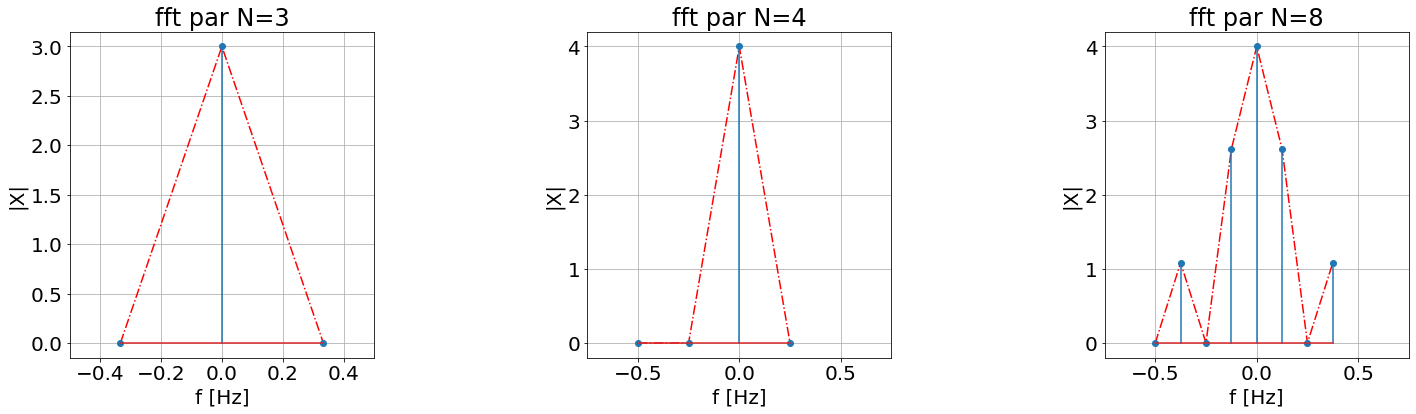

In [56]:
graficar_multiples_N( x, Ns, path='./Img/punto_3_b.png' )

## C)

In [7]:
N = 256
fft_resultado = calcular_fft( x, 256, numero_muestras = 4 )

/home/lautaro/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


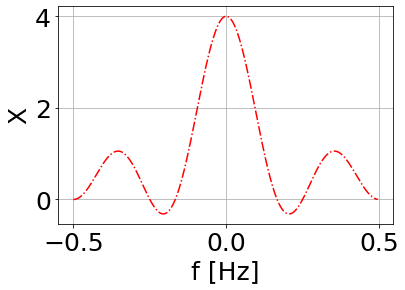

In [8]:
fig = plt.figure()
ax = fig.gca()
ax.plot( fft_resultado['freq'], fft_resultado['shift_X'], 'r-.' )
#ax.stem( fft_resultado['freq'], np.abs(fft_resultado['shift_X']) )

ax.grid()
ax.set_xlabel( 'f [Hz]' )
ax.set_ylabel( 'X' )
plt.savefig( './Img/punto_3_c.png' )

## Animacion

In [9]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML
import seaborn as sns

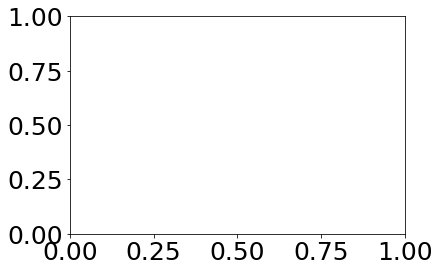

In [10]:
fig = plt.figure()
ax = fig.gca()
N = [ i+1 for i in range( 1024 ) ]
def animate( i ):
    ax.cla()
    ax.stem( f[i], X[i] )
    ax.set_title( 'aproximacion DTFT con N='+str(N[i]) )
    ax.set_xlabel('f [Hz]')
    ax.set_ylabel('|X|')
    ax.set_xlim( [ -.6, .6 ] )
    ax.set_ylim( [0, 5] )
    ax.grid()

In [11]:
resultado_fft_animacion = calcular_fft( x, N, numero_muestras=4 )

In [12]:
f = resultado_fft_animacion['freq']
X = resultado_fft_animacion['shift_X']

In [13]:
graficar = input('desea graficar?: ')
if graficar=='si':
    anim = FuncAnimation(fig, animate, frames=512)
    anim.save('./DFTF_stem.mp4', writer='ffmpeg', fps=30)

desea graficar?: no


## e)

In [14]:
escalon = lambda n: np.piecewise( n, n>=0 ,[1, 0])
x_1 = lambda n: n * escalon( n ) * escalon( 4- n ) + (10-n)*escalon(n-5)*escalon(10-n)
x_2 = lambda n: escalon( n+2  ) * escalon( 2-n )
x_3 = lambda n: (-.5)**n * escalon( n )

In [15]:
def graficar_fft( x, N, path=None, numero_muestras=None ):
    resultado_fft = calcular_fft( x, N, numero_muestras= numero_muestras )
    X = resultado_fft['shift_X']
    f = resultado_fft['freq']
    
    mod_X =  np.abs( X )
    arg_X = np.angle( X )
    
    fig, axs = plt.subplots( 2, 1 )
    
    axs[0].plot( f, mod_X )
    axs[0].grid()
    axs[0].set_xlabel( 'f [Hz]' ) 
    axs[0].set_ylabel( '|X|' ) 
    
    axs[1].plot( f, arg_X )
    axs[1].grid()
    axs[1].set_xlabel( 'f [Hz]' ) 
    axs[1].set_ylabel( 'Arg(X)' ) 
    

    if( path ):
        plt.savefig( path )

In [16]:
graficar_fft( x_1,512 , './Img/punto_3_e_1.png', numero_muestras= )

SyntaxError: invalid syntax (<ipython-input-16-3aa7b6ec303a>, line 1)

In [ ]:
graficar_fft( x_2, 1024, './Img/punto_3_e_2.png', numero_muestras=3 )

In [ ]:
graficar_fft( x_3, 5, './Img/punto_3_e_3.png' )

In [ ]:
x_4 = lambda n: 0.8 ** n *escalon(n)

In [ ]:
graficar_fft( x_3, 5, './Img/punto_3_e_3.png', numero_muestras=5 )

In [ ]:
x = [1, 2, 3, 4, 5]
y = x

In [ ]:
fig = plt.figure( figsize=(4,8) )
ax = fig.gca()
ax.stem( x, y )